### Real Estate Modelling Project -Srini

### Objective

-Build a model to predict house prices based on features provided in the dataset. <br />
-One of those parameters include understanding which factors are responsible for higher property value - $650K and above.<br />
-The data set consists of information on some 22,000 properties.  <br />
-The dataset consisted of historic data of houses sold between May 2014 to May 2015.<br />
-Tools to be used are Pandas (Jupyter notebook) and Tableau.<br />

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

### Fetching the data

In [2]:
df=pd.read_excel("Data_MidTerm_Project_Real_State_Regression.xls" ) # reading the excel file

#### Checking the data type of the features for any corrections

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

#### Checking the column headers for case consistency and spacing for any corrections

In [4]:
col_list = df.columns
col_list

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [5]:
#filtered view of the repetitive house ids
repetitive_sales = df.groupby('id').filter(lambda x: len(x) > 1) 
repetitive_sales

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,2014-06-18,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,2014-09-05,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20763,6300000226,2014-06-26,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,240000
20764,6300000226,2015-05-04,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000
21564,7853420110,2014-10-03,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,594866


#### Exploring the data

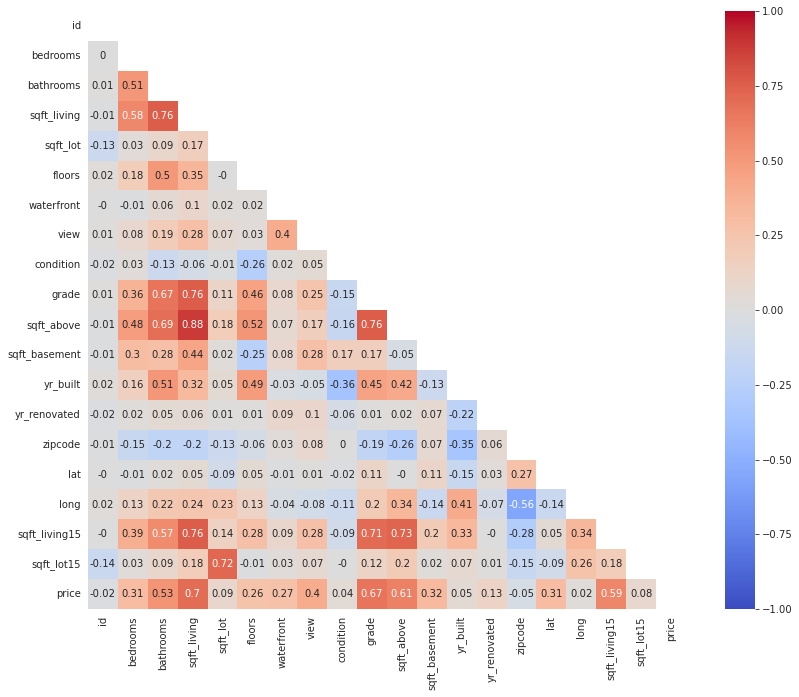

In [6]:
corr = round(df.corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 11))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [7]:
# List of variables to be dropped from the model
drop_list = ["price",
             "id",
             "yr_renovated",
             "floors",
             "sqft_above",
             "sqft_basement",
             "sqft_lot",
             "sqft_lot15",
             "sqft_living15"]  # to be removed are "waterfront", "view"

In [8]:
outlier_list = []
for item in df.columns:
    if item not in drop_list:
        if item not in ['price','date']: # target variable
            outlier_list.append(item)

outlier_list

['bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long']

In [9]:
# placeholder for dealing with outliers
#Q1 = df.sqft_basement.quantile(0.25)
#Q3 = df.sqft_basement.quantile(0.75)
#IQR = Q3 - Q1    #IQR is interquartile range.

#filter = (df["sqft_lot"] <= 300000) # Removed the houses with more than sqft_lot >300000, that accounted for 71 records 
#df=df.loc[filter]
#filter = (df['bedrooms'] !=33) # Removed the houses with less than condition value 1, that accounted for 29 records 
#df=df.loc[filter]

In [10]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


#### Applying Box-cox Powertransform

In [11]:
def plots (df, var, t):
    plt.figure(figsize= (13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after' + str(t).split('(')[0])

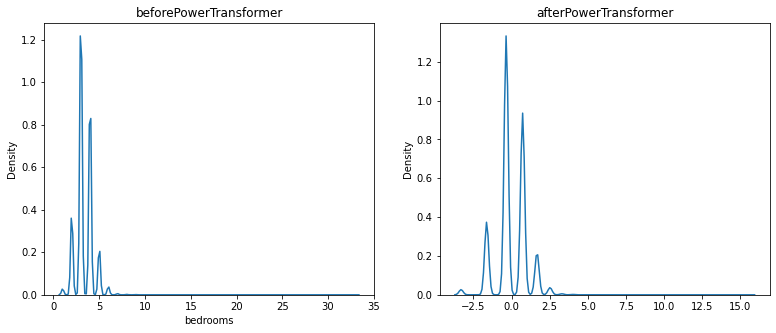

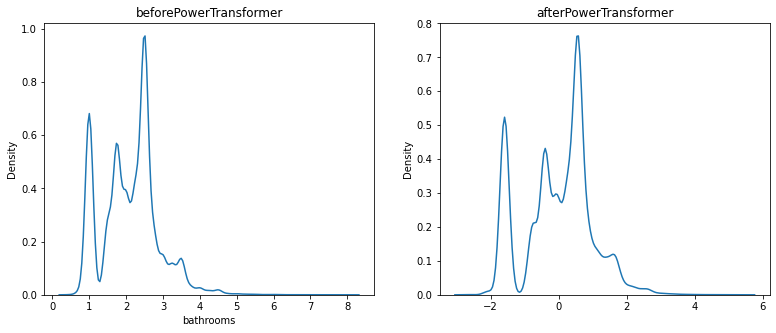

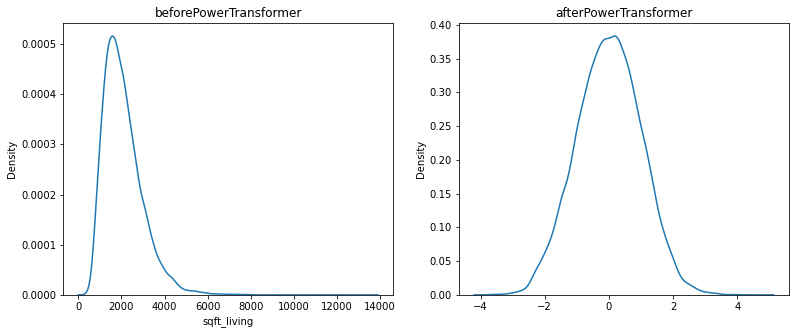

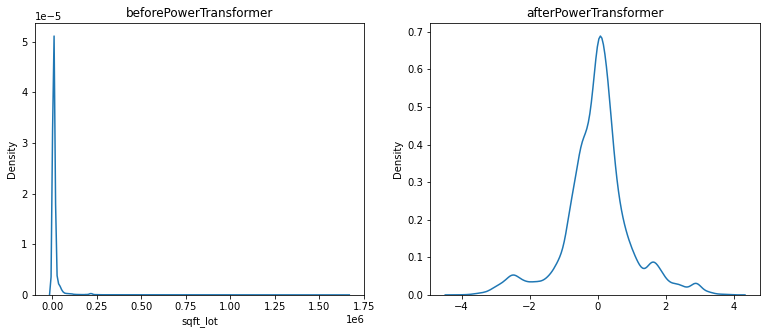

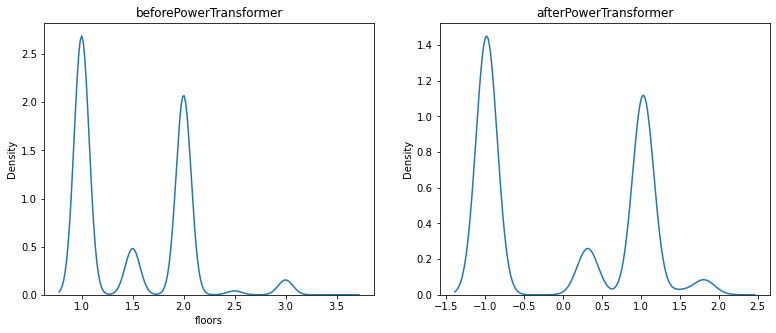

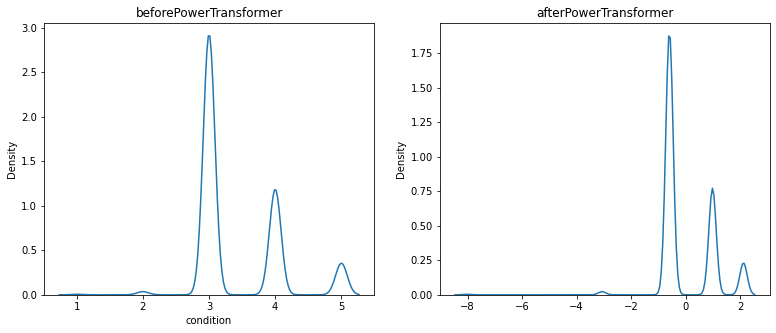

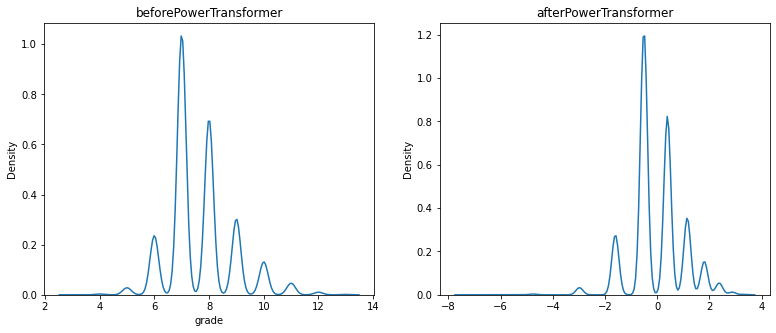

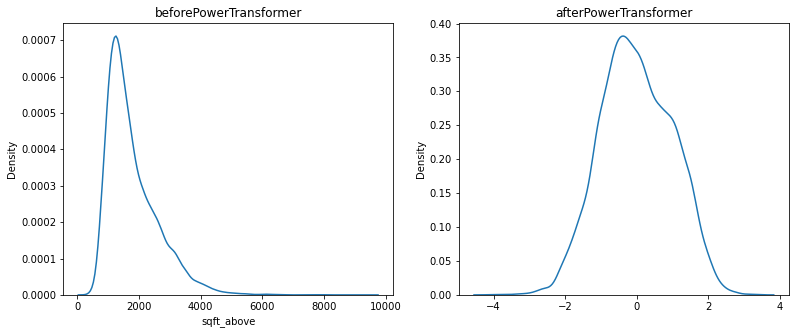

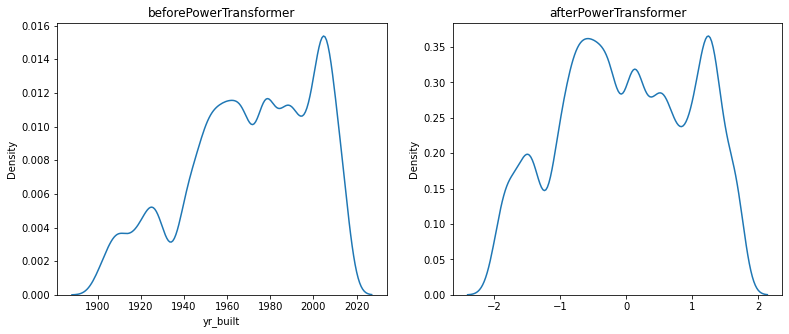

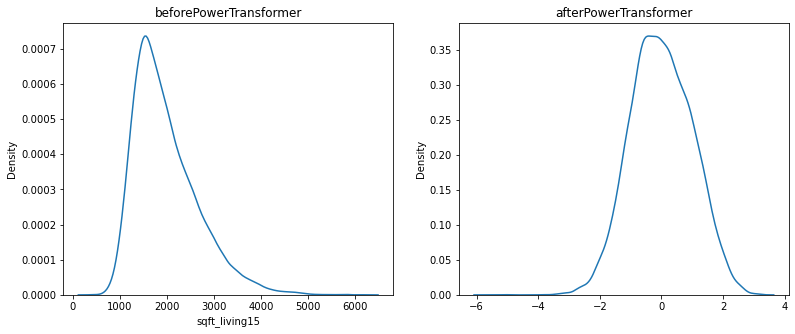

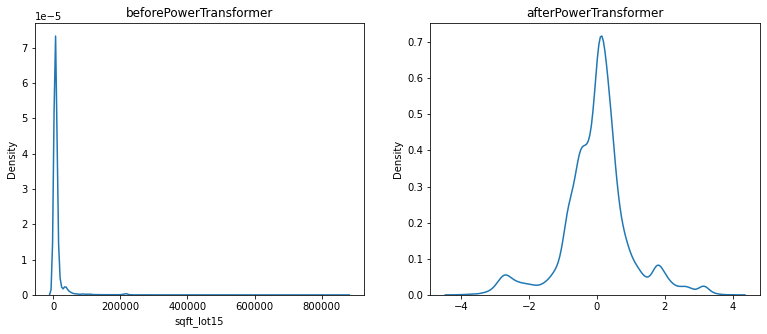

In [12]:
box_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above',
       'yr_built', 'sqft_living15', 'sqft_lot15']
for col in box_col:
    plots(df, col, PowerTransformer (method='box-cox'))

In [13]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [14]:
nulls_df = pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,id,0.0
1,date,0.0
2,bedrooms,0.0
3,bathrooms,0.0
4,sqft_living,0.0
5,sqft_lot,0.0
6,floors,0.0
7,waterfront,0.0
8,view,0.0
9,condition,0.0


#### Preparing the data

In [15]:
# x = df.drop("price", axis=1)
x = df._get_numeric_data()
y = x['price']

In [16]:
for col in drop_list:
    x.drop([col],axis=1,inplace=True)

In [17]:
#df['waterfront'].apply(str)

In [18]:
#df['view'].apply(str)

In [19]:
#df.waterfront.value_counts()

In [20]:
#x_cat = df.select_dtypes("object")
#x_cat = df['waterfront','view']

In [21]:
#x_cat_ord = x_cat[["waterfront", "view"]]
#categories = [['0', '1'], ['0','1','2','3','4']]

#ordinal_encoder = OrdinalEncoder(categories=categories)
#x_cat_ord_encoded = pd.DataFrame(ordinal_encoder.fit_transform(x_cat_ord),columns=x_cat_ord.columns)

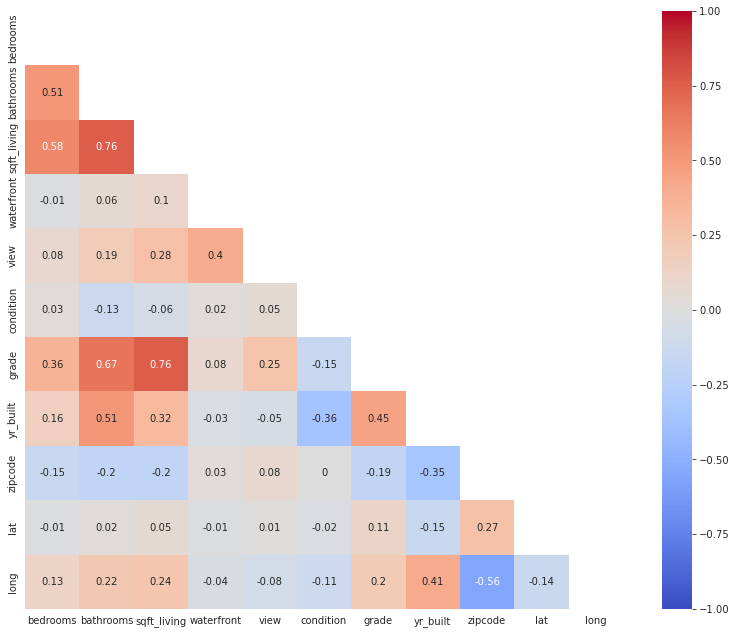

In [22]:
corr = round(x.corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 11))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

#### Modelling the data

In [23]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21597, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state =1)

In [25]:
std_scaler=StandardScaler().fit(x_train) 

x_train_scaled=std_scaler.transform(x_train)

x_test_scaled=std_scaler.transform(x_test)

In [26]:
x_train_scaled[0]

array([-1.47032529, -0.15705982, -1.21461283, -0.08793644, -0.31009135,
        2.44006956, -1.4135625 , -1.04999564,  1.26530005, -0.38200237,
       -1.11930344])

### Modeling using Statsmodels

#### without scaling

In [27]:
x_train_const= sm.add_constant(x_train) # adding a constant

model = sm.OLS(y_train, x_train_const).fit()
predictions_train = model.predict(x_train_const) 

x_test_const = sm.add_constant(x_test) # adding a constant
predictions_test = model.predict(x_test_const) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3078.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:39:38   Log-Likelihood:            -2.0649e+05
No. Observations:               15117   AIC:                         4.130e+05
Df Residuals:                   15105   BIC:                         4.131e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.822e+06   3.43e+06      2.864      

#### checking the significant variables

In [28]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[1:].index.tolist()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long']

In [29]:
significant_features=x[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[1:].index.tolist()]

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)
coefficients = list(model.coef_)
coefficients

[-37978.703630728916,
 44463.9787482695,
 183.8721357171218,
 622857.9694415822,
 49145.859455603844,
 20272.75899944026,
 104664.36593459507,
 -2713.8917247721856,
 -596.2764401938862,
 596333.4675296148,
 -204163.0007239235]

#### with scaling

In [31]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')

In [32]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3078.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:39:39   Log-Likelihood:            -2.0649e+05
No. Observations:               15117   AIC:                         4.130e+05
Df Residuals:                   15105   BIC:                         4.131e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.414e+05   1684.509    321.384      0.0

#### Linear regression

In [33]:
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)   # model train

y
y_pred=model.predict(x_test_scaled)   # model prediction


y_pred_train=model.predict(x_train_scaled)

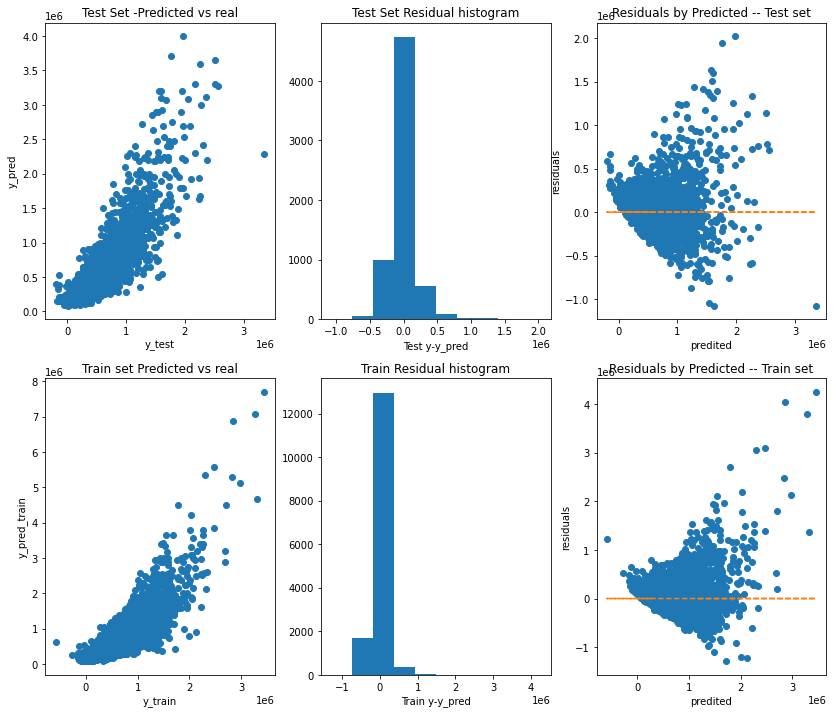

In [34]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,3,figsize=(14,12))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[0,2].plot(y_pred,y_test - y_pred,"o")
ax[0,2].set_xlabel("predited")
ax[0,2].set_ylabel("residuals")
ax[0,2].set_title("Residuals by Predicted -- Test set")
ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
ax[1,2].set_xlabel("predited")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')

In [35]:
y_pred =model.predict(x_test_scaled).astype(int)
y_change = round((y_pred/y_test)-1, 2)
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred, "∆ %": y_change})
result

,y_test,y_pred,∆ %
16729,244500,123255,-0.50
10996,190000,144532,-0.24
12089,348500,416354,0.19
554,396000,516676,0.30
16075,665000,680459,0.02
...,...,...,...
17975,500000,864163,0.73
4326,330000,273533,-0.17
7353,907000,732172,-0.19
6774,292000,372987,0.28


Text(0.5, 0, 'y_test - y_pred')

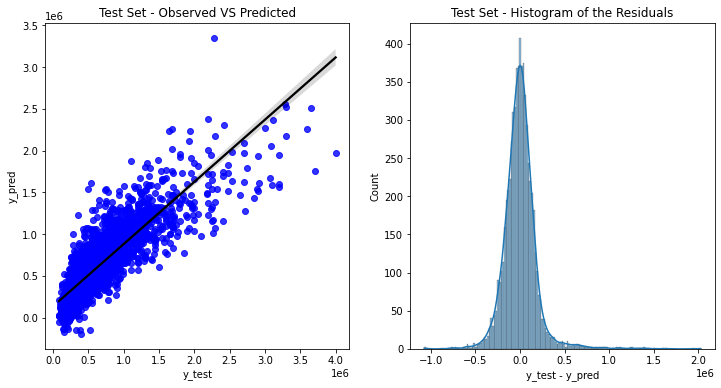

In [36]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.regplot(x="y_test", y="y_pred", data=result, scatter_kws={"color": "blue"}, line_kws={"color": "black"}, ax=axs[0])
sns.histplot(y_test-y_pred, kde=True, ax=axs[1])

axs[0].set_title("Test Set - Observed VS Predicted")
axs[1].set_title("Test Set - Histogram of the Residuals")
axs[1].set_xlabel("y_test - y_pred")


### Model validation

In [37]:
train_mse=mse(y_train,y_pred_train)
test_mse=mse(y_test,y_pred)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 42861496880.71504 -- test MSE: 36146236718.89629


RMSE

In [38]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 207030.18350162142 -- test RMSE: 190121.63664058936


MAE

In [39]:
train_mae=mae(y_train,y_pred_train)
test_mae=mae(y_test,y_pred)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 42861496880.71504 -- test MAE: 36146236718.89629


R2

In [40]:
#R2= model.score(X_test_scaled, y_test)
R2_train=r2_score(y_train,y_pred_train)
R2_test=r2_score(y_test,y_pred)

print (R2_train)
print(R2_test)

0.6914914882938902
0.7123566579954994


In [41]:
print ('train R2: {} -- test R2: {}'.format(model.score(x_train_scaled, y_train),
                                            model.score(x_test_scaled, y_test)))

train R2: 0.6914914882938902 -- test R2: 0.712356654484634


adjusted rsquare

In [42]:
Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
Adj_R2_train

0.6912668213869874

In [43]:
Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_R2_test

0.7118674686383488

In [44]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [45]:
features_importances

,Attribute,Importance
2,sqft_living,168393.000474
6,grade,123169.846297
9,lat,82890.161388
7,yr_built,80006.438721
3,waterfront,54351.622441
4,view,37952.487181
0,bedrooms,35554.242862
1,bathrooms,34261.787567
8,zipcode,31926.494353
10,long,28664.477722


In [46]:
metrics = {"MSE":mse(y_test, y_pred), "RMSE":mse(y_test, y_pred, squared=False), "MAE":mae(y_test, y_pred), "R2":r2_score(y_test, y_pred)}

In [47]:
metrics

{'MSE': 36146236718.89629,
 'RMSE': 190121.63664058936,
 'MAE': 124962.75956790123,
 'R2': 0.7123566579954994}

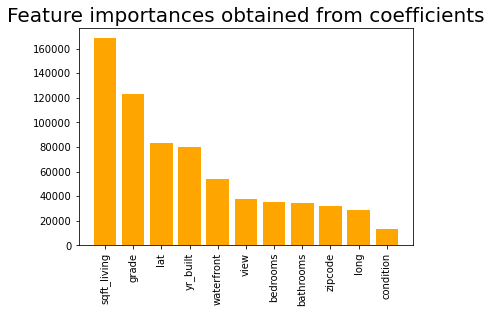

In [48]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='Orange')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Fine-tuning the models

#### Presenting the results

1.Summary of the dataset in 1 min, the key aspects of the dataset and observation. <br />
2. 
